# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# Data Generation

In [2]:
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=365, freq="D")
trend = np.linspace(10, 20, 365)
seasonality = 2 * np.sin(np.linspace(0, 6 * np.pi, 365))
noise = np.random.normal(0, 0.5, 365)
data = trend + seasonality + noise
df = pd.DataFrame(data, index=date_range, columns=["Sales"])


#  Visualizing the Sales Data

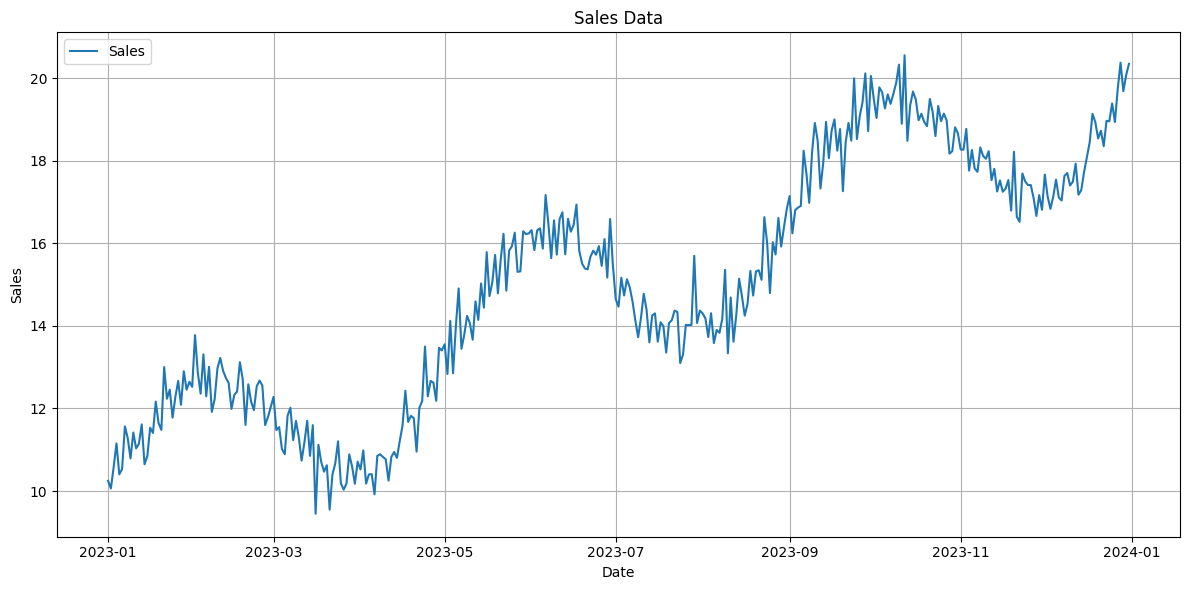

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df, label="Sales")
plt.title("Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Applying auto_arima for Model Selection

In [4]:
!pip install pmdarima
import pmdarima as pm
auto_model = pm.auto_arima(df, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=618.888, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=771.273, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=667.639, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=623.326, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=769.854, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=578.462, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=618.374, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=620.072, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=617.594, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=615.402, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=618.703, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=577.864, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=621.748, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=623.569, 

auto_arima from the pmdarima package is used to automatically select the best  ,ARIMA model based on AIC (Akaike Information Criterion).
- seasonal=False specifies that we're assuming a non-seasonal ARIMA model.
- trace=True enables the display of the model selection process.
- stepwise=True uses a more efficient search algorithm to find the best model.
The model's summary provides details on the selected ARIMA order and diagnostic statistics.

# Forecasting Future Sales

In [5]:
forecast_steps = 30
forecast, conf_int = auto_model.predict(n_periods=forecast_steps, return_conf_int=True)
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=["Forecast"])
conf_int_df = pd.DataFrame(conf_int, index=forecast_dates, columns=["Lower Bound", "Upper Bound"])


- The forecast is calculated for the next 30 days.
- Confidence intervals for the forecast are obtained and stored for visualization.

# Visualizing the Forecast

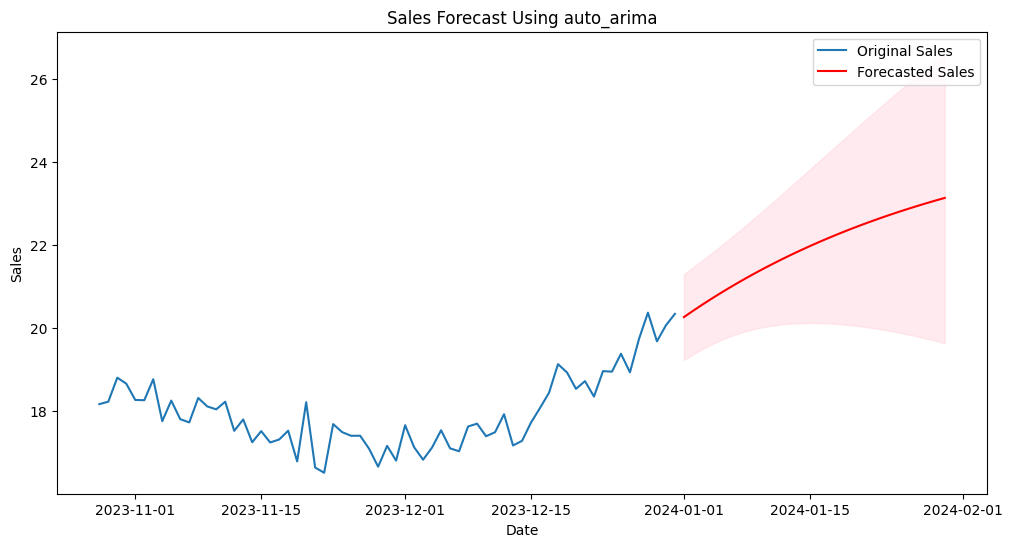

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df[300:], label="Original Sales")
plt.plot(forecast_df, label="Forecasted Sales", color="red")
plt.fill_between(forecast_dates, conf_int_df["Lower Bound"], conf_int_df["Upper Bound"], color="pink", alpha=0.3)
plt.title("Sales Forecast Using auto_arima")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


**Forecasted Trend:** The forecasted sales (red line) shows a logical continuation of the trend observed in the historical data. Since the data appears to have an upward trend, the model’s prediction of a continued increase aligns well with that trend.

**Confidence Intervals(95%):** The widening confidence intervals (shaded pink area) are a normal aspect of time series forecasts. This widening reflects increasing uncertainty over time, which is expected and typical in forecasting.

**Visual Representation:** The plot effectively displays both the historical data and the forecast with confidence intervals, making it easy to interpret. This helps in visualizing the likely range of future sales, as well as the central tendency (expected forecast).